In [1]:
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df=pd.read_csv("./Iris_dataset.csv")

In [11]:
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [12]:
data=df.drop(['sepal.length','sepal.width'],axis=1)

In [13]:
train_dict={"Setosa":[[],[]],"Versicolor":[[],[]],"Virginica":[[],[]]}
test_dict=[]

In [14]:
rows=[tuple(u) for u in data.itertuples(index=False)]
for i in range(len(rows)):
    if(i in [0,50,100]):
        print(i)
        test_dict.append(rows[i])
    else:
        train_dict[rows[i][2]][0].append(rows[i][0])
        train_dict[rows[i][2]][1].append(rows[i][1])

0
50
100


In [15]:
def colorcode(st):
    d={"Setosa":"red","Versicolor":"green","Virginica":"blue"}
    return(d[st])

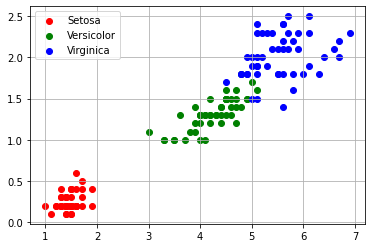

In [16]:
fig,ax=plt.subplots()
for i in ["Setosa","Versicolor","Virginica"]:
    ax.scatter(train_dict[i][0],train_dict[i][1],c=colorcode(i),label=i)
    

ax.legend()
ax.grid(True)

plt.show()

In [17]:
def mahalanobis(p1,p2,v1,v2):
    avgp1=np.average(p1)
    avgp2=np.average(p2)
    d=np.array([v1-avgp1,v2-avgp2])
    covar=np.cov([p1,p2],ddof=1)
    invcov=np.linalg.inv(covar)
    tmp=np.dot(invcov,d.T)
    #print(tmp)
    mdsq=np.dot(d,tmp)
    #print(mdsq)
    return ((mdsq)**0.5)

In [19]:
#[64,66,68,69,73][580,570,590,660,600][29,33,37,46,55]
mahalanobis([64,66,68,69,73],[580,570,590,660,600],66, 640)

1.6261028646170543

In [20]:
inde=[0,50,100]
predicted_tmp=[]
for i in test_dict:
    pred=dict()
    for j in train_dict:
        pred[j]=mahalanobis(train_dict[j][0],train_dict[j][1],i[0],i[1])
    predicted_tmp.append(pred)

In [21]:
predicted=["Setosa"]*3
for i in range(3):
    for c in predicted_tmp[i]:
        if(predicted_tmp[i][predicted[i]]>predicted_tmp[i][c]):
            predicted[i]=c
predicted

['Setosa', 'Versicolor', 'Virginica']

In [22]:
for t in range(3):
    print(test_dict[t],"Prediction:",predicted[t])
    print(predicted_tmp[t],"\n")

(1.4, 0.2, 'Setosa') Prediction: Setosa
{'Setosa': 0.49719826291089175, 'Versicolor': 6.2200147143894196, 'Virginica': 8.836776567169137} 

(4.7, 1.4, 'Versicolor') Prediction: Versicolor
{'Setosa': 19.14828027204835, 'Versicolor': 1.130580072221175, 'Virginica': 2.4508748470314594} 

(6.0, 2.5, 'Virginica') Prediction: Virginica
{'Setosa': 29.16207426622122, 'Versicolor': 6.079684544928463, 'Virginica': 1.8231083365225484} 



There were no errors

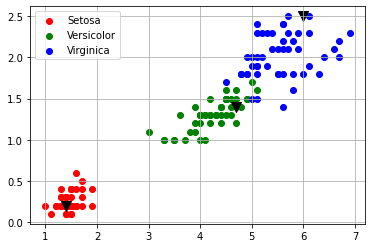

In [24]:
fig,ax=plt.subplots()
for i in ["Setosa","Versicolor","Virginica"]:
    ax.scatter(train_dict[i][0],train_dict[i][1],c=colorcode(i),label=i)
for t in range(3):
    ax.scatter(test_dict[t][0],test_dict[t][1],c="black",marker="v",s=100)
ax.legend()
ax.grid(True)
plt.show()